# The battle of the neighborhoods - Paris

## 1. Download and Explore city of Paris geographical coordinates dataset

Paris has a total of 20 boroughs (*arrondissements* in french) and 80 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 20 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.

First, let's import all libraries that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!pip install geopy
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Load and Explore data

The dataset, that contains boroughs of Paris, already exists for free under JSON web. Link to download dataset: https://www.data.gouv.fr/fr/datasets/r/e88c6fda-1d09-42a0-a069-606d3259114e

In [2]:
# open JSON file that contains geolocalisation information about boroughs in île-de-France region
with open('correspondances-code-insee-code-postal.json') as json_file:
    data = json.load(json_file)

print(data)

[{'datasetid': 'correspondances-code-insee-code-postal', 'recordid': '2bf36b38314b6c39dfbcd09225f97fa532b1fc45', 'fields': {'code_comm': '645', 'nom_dept': 'ESSONNE', 'statut': 'Commune simple', 'z_moyen': 121.0, 'nom_region': 'ILE-DE-FRANCE', 'code_reg': '11', 'insee_com': '91645', 'code_dept': '91', 'geo_point_2d': [48.750443119964764, 2.251712972144151], 'postal_code': '91370', 'id_geofla': '16275', 'code_cant': '03', 'geo_shape': {'type': 'Polygon', 'coordinates': [[[2.238024349288764, 48.735565859837095], [2.226414985434264, 48.75003536744732], [2.22450256558849, 48.75882853410981], [2.232859032169924, 48.76598806763034], [2.250043759055985, 48.761213267519565], [2.269288614654887, 48.76063999654954], [2.276145972515501, 48.75666127305422], [2.283691112862691, 48.748081131389654], [2.274517407535147, 48.74072222671912], [2.238024349288764, 48.735565859837095]]]}, 'superficie': 999.0, 'nom_comm': 'VERRIERES-LE-BUISSON', 'code_arr': '3', 'population': 15.5}, 'geometry': {'type': 'Po

In [3]:
df_idf = pd.read_json('correspondances-code-insee-code-postal.json')
df_idf.head()

datasetid  \
0  correspondances-code-insee-code-postal   
1  correspondances-code-insee-code-postal   
2  correspondances-code-insee-code-postal   
3  correspondances-code-insee-code-postal   
4  correspondances-code-insee-code-postal   

                                              fields  \
0  {'code_comm': '645', 'nom_dept': 'ESSONNE', 's...   
1  {'code_comm': '133', 'nom_dept': 'SEINE-ET-MAR...   
2  {'code_comm': '378', 'nom_dept': 'ESSONNE', 's...   
3  {'code_comm': '243', 'nom_dept': 'SEINE-ET-MAR...   
4  {'code_comm': '414', 'nom_dept': 'SEINE-ET-MAR...   

                                            geometry  \
0  {'type': 'Point', 'coordinates': [2.2517129721...   
1  {'type': 'Point', 'coordinates': [3.0529405055...   
2  {'type': 'Point', 'coordinates': [2.1971816504...   
3  {'type': 'Point', 'coordinates': [2.7097808131...   
4  {'type': 'Point', 'coordinates': [3.2582355268...   

                record_timestamp                                  recordid  
0  2016-09-21T00:29:06.175+02:00  2bf36b38314b6c39dfbcd09225f97fa532b1fc45  
1  2016-09-21T00:29:06.175+02:00  7ee82e74e059b443df18bb79fc5a19b1f05e5a88  
2  2016-09-21T00:29:06.175+02:00  e2cd3186f07286705ed482a10b6aebd9de633c81  
3  2016-09-21T00:29:06.175+02:00  868bf03527a1d0a9defe5cf4e6fa0a730d725699  
4  2016-09-21T00:29:06.175+02:00  1bbcee92101fdb50f5f5fceb052681f2421ff961

All the relevant data is in the features key, which is basically a list of the boroughs. So, define a new variable that includes this data.

**Tranform the data concerning *boroughs* into a pandas dataframe**

The next task is essentially transforming this data of nested Python dictionaries into a pandas dataframe. Start by creating an empty dataframe.

In [4]:
df_idf_r = pd.DataFrame()
for m in df_idf.fields:
    dict_new = m
    df_idf_r = df_idf_r.append(dict_new, ignore_index=True)

df_idf_r.head()

code_arr code_cant code_comm code_dept code_reg  \
0        3        03       645        91       11   
1        3        20       133        77       11   
2        1        09       378        91       11   
3        5        14       243        77       11   
4        3        25       414        77       11   

                              geo_point_2d  \
0  [48.750443119964764, 2.251712972144151]   
1   [48.41256065214989, 3.052940505560729]   
2    [48.52726809075556, 2.19718165044305]   
3  [48.87307018579678, 2.7097808131278462]   
4  [48.62891464105825, 3.2582355268439223]   

                                           geo_shape id_geofla insee_com  \
0  {'type': 'Polygon', 'coordinates': [[[2.238024...     16275     91645   
1  {'type': 'Polygon', 'coordinates': [[[3.076046...     31428     77133   
2  {'type': 'Polygon', 'coordinates': [[[2.203466...     30975     91378   
3  {'type': 'Polygon', 'coordinates': [[[2.727542...     17000     77243   
4  {'type': 'Polygon', 'coordinates': [[[3.294591...     34949     77414   

               nom_comm        nom_dept     nom_region  population  \
0  VERRIERES-LE-BUISSON         ESSONNE  ILE-DE-FRANCE        15.5   
1  COURCELLES-EN-BASSEE  SEINE-ET-MARNE  ILE-DE-FRANCE         0.2   
2             MAUCHAMPS         ESSONNE  ILE-DE-FRANCE         0.3   
3       LAGNY-SUR-MARNE  SEINE-ET-MARNE  ILE-DE-FRANCE        20.2   
4        SAINT-HILLIERS  SEINE-ET-MARNE  ILE-DE-FRANCE         0.4   

  postal_code            statut  superficie  z_moyen  
0       91370    Commune simple       999.0    121.0  
1       77126    Commune simple      1082.0     88.0  
2       91730    Commune simple       313.0    150.0  
3       77400  Chef-lieu canton       579.0     71.0  
4       77160    Commune simple      1907.0    158.0

We will select just boroughs that are in city of Paris. limit application to Paris.

In [5]:
df_paris = df_idf_r[df_idf_r["nom_dept"] == "PARIS"].reset_index(drop = True)
df_paris.head()

code_arr code_cant code_comm code_dept code_reg  \
0        1        23       109        75       11   
1        1        24       110        75       11   
2        1        30       116        75       11   
3        1        16       102        75       11   
4        1        25       111        75       11   

                             geo_point_2d  \
0  [48.87689616237872, 2.337460241388529]   
1  [48.87602855694339, 2.361112904561707]   
2  [48.86039876035177, 2.262099559395783]   
3  [48.86790337886785, 2.344107166658533]   
4  [48.85941549762748, 2.378741060237548]   

                                           geo_shape id_geofla insee_com  \
0  {'type': 'Polygon', 'coordinates': [[[2.325754...     16867     75109   
1  {'type': 'Polygon', 'coordinates': [[[2.363856...      8429     75110   
2  {'type': 'Polygon', 'coordinates': [[[2.262784...     36580     75116   
3  {'type': 'Polygon', 'coordinates': [[[2.350834...     14312     75102   
4  {'type': 'Polygon', 'coordinates': [[[2.399114...     36586     75111   

                   nom_comm nom_dept     nom_region  population postal_code  \
0   PARIS-9E-ARRONDISSEMENT    PARIS  ILE-DE-FRANCE        60.3       75009   
1  PARIS-10E-ARRONDISSEMENT    PARIS  ILE-DE-FRANCE        95.9       75010   
2  PARIS-16E-ARRONDISSEMENT    PARIS  ILE-DE-FRANCE       169.4       75016   
3   PARIS-2E-ARRONDISSEMENT    PARIS  ILE-DE-FRANCE        22.4       75002   
4  PARIS-11E-ARRONDISSEMENT    PARIS  ILE-DE-FRANCE       152.7       75011   

             statut  superficie  z_moyen  
0  Chef-lieu canton       218.0     44.0  
1  Chef-lieu canton       288.0     45.0  
2  Chef-lieu canton      1641.0     43.0  
3  Chef-lieu canton        99.0     36.0  
4  Chef-lieu canton       366.0     43.0

Each borough in Paris is labelled by a number. Dataframe that contains boroughs will be sorted according to number of borough.

In [6]:
df_paris.sort_values(by = 'postal_code',axis = 0, ascending = True, inplace = True)
df_paris.head()

code_arr code_cant code_comm code_dept code_reg  \
14        1        15       101        75       11   
3         1        16       102        75       11   
7         1        17       103        75       11   
17        1        18       104        75       11   
15        1        19       105        75       11   

                               geo_point_2d  \
14    [48.8626304851685, 2.336293446550539]   
3    [48.86790337886785, 2.344107166658533]   
7    [48.86305413181178, 2.359361058970589]   
17  [48.854228281954754, 2.357361938142205]   
15  [48.844508659617546, 2.349859385560182]   

                                            geo_shape id_geofla insee_com  \
14  {'type': 'Polygon', 'coordinates': [[[2.344559...     36588     75101   
3   {'type': 'Polygon', 'coordinates': [[[2.350834...     14312     75102   
7   {'type': 'Polygon', 'coordinates': [[[2.368401...     36582     75103   
17  {'type': 'Polygon', 'coordinates': [[[2.364320...     11667     75104   
15  {'type': 'Polygon', 'coordinates': [[[2.365944...     13706     75105   

                    nom_comm nom_dept     nom_region  population postal_code  \
14  PARIS-1ER-ARRONDISSEMENT    PARIS  ILE-DE-FRANCE        17.6       75001   
3    PARIS-2E-ARRONDISSEMENT    PARIS  ILE-DE-FRANCE        22.4       75002   
7    PARIS-3E-ARRONDISSEMENT    PARIS  ILE-DE-FRANCE        35.7       75003   
17   PARIS-4E-ARRONDISSEMENT    PARIS  ILE-DE-FRANCE        28.2       75004   
15   PARIS-5E-ARRONDISSEMENT    PARIS  ILE-DE-FRANCE        61.5       75005   

              statut  superficie  z_moyen  
14   Capitale d'état       181.0     33.0  
3   Chef-lieu canton        99.0     36.0  
7   Chef-lieu canton       116.0     35.0  
17  Chef-lieu canton       160.0     33.0  
15  Chef-lieu canton       252.0     42.0

Different columns in dataframe and rename someones to be more significants.  

* *nom_comm* or *num_arr*: the number or noun of boroughs (*arrondissements*).
* *nom_dept*: contains name of city in *île-de-France* region in this case city of Paris.
* *nom_region*: name of region in this case *île-de-France*.
* *population*: number of person in each borough per 1000.
* *postal_code*: postal code of each borough.
* *status*: status of each borough.

In [7]:
df_paris = df_paris[['nom_comm','nom_dept','nom_region','population','postal_code','statut','geo_point_2d']].reset_index(drop = True)

df_paris = df_paris.rename(columns = {"nom_comm":"num_arr"})

In [8]:
# Transform label of each borough by number of borough
df_paris.loc[0:8,'num_arr'] = df_paris.loc[0:8,"num_arr"].str[6:7].astype(int)
df_paris.loc[9:,'num_arr'] = df_paris.loc[9:,"num_arr"].str[6:8].astype(int)

df_paris.head()

num_arr nom_dept     nom_region  population postal_code            statut  \
0        1    PARIS  ILE-DE-FRANCE        17.6       75001   Capitale d'état   
1        2    PARIS  ILE-DE-FRANCE        22.4       75002  Chef-lieu canton   
2        3    PARIS  ILE-DE-FRANCE        35.7       75003  Chef-lieu canton   
3        4    PARIS  ILE-DE-FRANCE        28.2       75004  Chef-lieu canton   
4        5    PARIS  ILE-DE-FRANCE        61.5       75005  Chef-lieu canton   

                              geo_point_2d  
0    [48.8626304851685, 2.336293446550539]  
1   [48.86790337886785, 2.344107166658533]  
2   [48.86305413181178, 2.359361058970589]  
3  [48.854228281954754, 2.357361938142205]  
4  [48.844508659617546, 2.349859385560182]

Extract neccessary features in boroughs' dataframe which are: number of borough, name of department, name of region, numbero of population, postal code and status and localisation for each borough.

In [9]:
df_paris

num_arr nom_dept     nom_region  population postal_code            statut  \
0         1    PARIS  ILE-DE-FRANCE        17.6       75001   Capitale d'état   
1         2    PARIS  ILE-DE-FRANCE        22.4       75002  Chef-lieu canton   
2         3    PARIS  ILE-DE-FRANCE        35.7       75003  Chef-lieu canton   
3         4    PARIS  ILE-DE-FRANCE        28.2       75004  Chef-lieu canton   
4         5    PARIS  ILE-DE-FRANCE        61.5       75005  Chef-lieu canton   
5         6    PARIS  ILE-DE-FRANCE        43.1       75006  Chef-lieu canton   
6         7    PARIS  ILE-DE-FRANCE        57.4       75007  Chef-lieu canton   
7         8    PARIS  ILE-DE-FRANCE        40.3       75008  Chef-lieu canton   
8         9    PARIS  ILE-DE-FRANCE        60.3       75009  Chef-lieu canton   
9        10    PARIS  ILE-DE-FRANCE        95.9       75010  Chef-lieu canton   
10       11    PARIS  ILE-DE-FRANCE       152.7       75011  Chef-lieu canton   
11       12    PARIS  ILE-DE-FRANCE       142.9       75012  Chef-lieu canton   
12       13    PARIS  ILE-DE-FRANCE       182.0       75013  Chef-lieu canton   
13       14    PARIS  ILE-DE-FRANCE       137.2       75014  Chef-lieu canton   
14       15    PARIS  ILE-DE-FRANCE       236.5       75015  Chef-lieu canton   
15       16    PARIS  ILE-DE-FRANCE       169.4       75016  Chef-lieu canton   
16       17    PARIS  ILE-DE-FRANCE       168.5       75017  Chef-lieu canton   
17       18    PARIS  ILE-DE-FRANCE       200.6       75018  Chef-lieu canton   
18       19    PARIS  ILE-DE-FRANCE       184.8       75019  Chef-lieu canton   
19       20    PARIS  ILE-DE-FRANCE       197.1       75020  Chef-lieu canton   

                               geo_point_2d  
0     [48.8626304851685, 2.336293446550539]  
1    [48.86790337886785, 2.344107166658533]  
2    [48.86305413181178, 2.359361058970589]  
3   [48.854228281954754, 2.357361938142205]  
4   [48.844508659617546, 2.349859385560182]  
5    [48.84896809191946, 2.332670898588416]  
6    [48.85608259819694, 2.312438687733857]  
7    [48.87252726662346, 2.312582560420059]  
8    [48.87689616237872, 2.337460241388529]  
9    [48.87602855694339, 2.361112904561707]  
10   [48.85941549762748, 2.378741060237548]  
11   [48.83515623066034, 2.419807034965275]  
12   [48.82871768452136, 2.362468228516128]  
13   [48.82899321160942, 2.327100883257538]  
14   [48.84015541860987, 2.293559372435076]  
15   [48.86039876035177, 2.262099559395783]  
16   [48.88733716648682, 2.307485559493426]  
17  [48.892735074561706, 2.348711933867703]  
18   [48.88686862295828, 2.384694327870042]  
19   [48.86318677744551, 2.400819826729021]

**Use geopy library to get the latitude and longitude values of Paris.**

In [10]:
address = 'PARIS ,PAR'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8418339, 2.3497835.


In [11]:
# create map of Paris using latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for [lat, lng], postcode, borough, population in zip(df_paris['geo_point_2d'], df_paris['postal_code'],df_paris['num_arr'], df_paris['population']):
    label = 'Arrondissement {}, population: {}'.format(borough, population*1000)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

Import another JSON file that contains neighborhoods according to each borough and download it from this link: https://opendata.paris.fr/explore/dataset/quartier_paris/download/?format=json&timezone=Europe/Berlin

In [12]:
# Extract neighborhoods in city of Paris
df_Q = pd.read_json('quartier_paris.json')

df_quartier = pd.DataFrame()

for q in df_Q.fields:
    dict_new = q
    df_quartier = df_quartier.append(dict_new, ignore_index=True)
    
df_quartier = df_quartier.rename(columns = {"c_ar":"num_arr","c_qu":"num_quartier","c_quinsee":"num_insee_quartier","l_qu":"quartier"})

convert_dict = {'num_arr': int}

df_quartier = df_quartier.astype(convert_dict)

df_quartier.head()

num_arr  num_quartier  num_insee_quartier  \
0        2           8.0           7510204.0   
1        5          18.0           7510502.0   
2        8          30.0           7510802.0   
3       13          52.0           7511304.0   
4       16          61.0           7511601.0   

                                                geom  \
0  {'type': 'Polygon', 'coordinates': [[[2.351518...   
1  {'type': 'Polygon', 'coordinates': [[[2.364561...   
2  {'type': 'Polygon', 'coordinates': [[[2.311968...   
3  {'type': 'Polygon', 'coordinates': [[[2.351662...   
4  {'type': 'Polygon', 'coordinates': [[[2.249224...   

                              geom_x_y            quartier      n_sq_ar  \
0       [48.8671501183, 2.35008019041]      Bonne-Nouvelle  750000002.0   
1       [48.8419401934, 2.35689388962]  Jardin-des-Plantes  750000005.0   
2       [48.8741355756, 2.30411880972]   Faubourg-du-Roule  750000008.0   
3       [48.8337336761, 2.34767304607]         Croulebarbe  750000013.0   
4  [48.8506223427, 2.2522769075399998]             Auteuil  750000016.0   

       n_sq_qu     perimetre       surface  
0  750000008.0   2233.976030  2.814482e+05  
1  750000018.0   4052.729521  7.983894e+05  
2  750000030.0   3773.673073  7.965891e+05  
3  750000052.0   3289.230480  6.920677e+05  
4  750000061.0  12452.253931  6.383888e+06

In [13]:
df_borough = df_paris[['num_arr','nom_dept','nom_region','postal_code','statut']].reset_index(drop = True)

Then, merge boroughs' dataframe and nerghborhoods' dataframe to have boroughs, neighborhoods and postal code in the same table.

In [14]:
df_quartier = df_quartier.join(df_borough.set_index('num_arr'), on='num_arr')

df_quartier.head()

num_arr  num_quartier  num_insee_quartier  \
0        2           8.0           7510204.0   
1        5          18.0           7510502.0   
2        8          30.0           7510802.0   
3       13          52.0           7511304.0   
4       16          61.0           7511601.0   

                                                geom  \
0  {'type': 'Polygon', 'coordinates': [[[2.351518...   
1  {'type': 'Polygon', 'coordinates': [[[2.364561...   
2  {'type': 'Polygon', 'coordinates': [[[2.311968...   
3  {'type': 'Polygon', 'coordinates': [[[2.351662...   
4  {'type': 'Polygon', 'coordinates': [[[2.249224...   

                              geom_x_y            quartier      n_sq_ar  \
0       [48.8671501183, 2.35008019041]      Bonne-Nouvelle  750000002.0   
1       [48.8419401934, 2.35689388962]  Jardin-des-Plantes  750000005.0   
2       [48.8741355756, 2.30411880972]   Faubourg-du-Roule  750000008.0   
3       [48.8337336761, 2.34767304607]         Croulebarbe  750000013.0   
4  [48.8506223427, 2.2522769075399998]             Auteuil  750000016.0   

       n_sq_qu     perimetre       surface nom_dept     nom_region  \
0  750000008.0   2233.976030  2.814482e+05    PARIS  ILE-DE-FRANCE   
1  750000018.0   4052.729521  7.983894e+05    PARIS  ILE-DE-FRANCE   
2  750000030.0   3773.673073  7.965891e+05    PARIS  ILE-DE-FRANCE   
3  750000052.0   3289.230480  6.920677e+05    PARIS  ILE-DE-FRANCE   
4  750000061.0  12452.253931  6.383888e+06    PARIS  ILE-DE-FRANCE   

  postal_code            statut  
0       75002  Chef-lieu canton  
1       75005  Chef-lieu canton  
2       75008  Chef-lieu canton  
3       75013  Chef-lieu canton  
4       75016  Chef-lieu canton

Examine our dataset if Nan values exists

In [15]:
df_quartier.isna().sum()

num_arr               0
num_quartier          0
num_insee_quartier    0
geom                  0
geom_x_y              0
quartier              0
n_sq_ar               0
n_sq_qu               0
perimetre             0
surface               0
nom_dept              0
nom_region            0
postal_code           0
statut                0
dtype: int64

In [16]:
df_quartier.shape

(80, 14)

**Use geopy library to get the latitude and longitude values of Paris.**

In [17]:
address = 'PARIS ,PAR'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8418339, 2.3497835.


**Create a map of Paris with neighborhoods superimposed on top.**

**Folium** is a great visualization library. We can zoom into the below map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

In [18]:
# create map of Paris using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for [lat, lng], postcode, borough, neighborhood in zip(df_quartier['geom_x_y'], df_quartier['postal_code'],df_quartier['num_arr'], df_quartier['quartier']):
    label = '{},Arrondissement: {}, Postal code: {}'.format(neighborhood, borough, postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## 2. Explore city of Paris - Borough cuisine dataset

The dataset, that will be used to explore different cuisine and restaurant in city of Paris, will be provided from **Foursquare API**. **Foursquare API** provides location based experiences with diverse information about venues, users, photos, and check-ins. The API supports real time access to places, Snap-to-Place that assigns users to specific locations, and Geo-tag. Additionally, Foursquare allows developers to build audience segments for analysis and measurement. JSON is the preferred response format.

source: https://www.programmableweb.com/api/foursquare

First, needed libraries will be imported.

In [19]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from PIL import Image # converting images into arrays

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# install wordcloud
#!pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Matplotlib version:  3.1.0
Wordcloud is installed and imported!


Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [20]:
# @hidden_cell
CLIENT_ID = 'QODH1LLWW5D35MDYI0E3F3N002QJJ05UWYFPKKJVYIPYAM1B' # your Foursquare ID
CLIENT_SECRET = 'YEU1LYQTDU5KJNPINUBEMDMHQXX2JTLNVP0NBIMOARW4VFUY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QODH1LLWW5D35MDYI0E3F3N002QJJ05UWYFPKKJVYIPYAM1B
CLIENT_SECRET:YEU1LYQTDU5KJNPINUBEMDMHQXX2JTLNVP0NBIMOARW4VFUY


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [21]:
# Explore a neighborhood in Paris (Quartier is translation of neighborhood in french)
element = 0

df_quartier.loc[element,'quartier']

'Bonne-Nouvelle'

Get the neighborhood's latitude and longitude values.

In [22]:
# Get neighborhood latitude and longitude
neighborhood_latitude = df_quartier.loc[element, 'geom_x_y'][0] # neighborhood latitude value
neighborhood_longitude = df_quartier.loc[element, 'geom_x_y'][1] # neighborhood longitude value

neighborhood_name = df_quartier.loc[element, 'quartier'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bonne-Nouvelle are 48.8671501183, 2.35008019041.


#### Now, let's get the top 100 venues that are in Bonne-Nouvelle within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [23]:
# @hidden_cell
radius = 500
LIMIT = 100

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=QODH1LLWW5D35MDYI0E3F3N002QJJ05UWYFPKKJVYIPYAM1B&client_secret=YEU1LYQTDU5KJNPINUBEMDMHQXX2JTLNVP0NBIMOARW4VFUY&ll=48.8671501183,2.35008019041&v=20180605&radius=500&limit=100'

Send the GET request and examine the resutls

In [24]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5dd977d31d67cb001b1a34b9'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Paris',
  'headerFullLocation': 'Paris',
  'headerLocationGranularity': 'city',
  'totalResults': 184,
  'suggestedBounds': {'ne': {'lat': 48.871650122800006,
    'lng': 2.356908334858929},
   'sw': {'lat': 48.8626501138, 'lng': 2.343252045961071}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57054c44498ed5a375ce4b86',
       'name': 'Hoppy Corner',
       'location': {'address': '34 rue des Petits Carreaux',
        'lat': 48.86772619731469,
        'lng': 2.3473745971313704,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.86772619731469,
       

We know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function.

In [25]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [26]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name            categories        lat       lng
0                Hoppy Corner              Beer Bar  48.867726  2.347375
1              Ma Cave Fleury              Wine Bar  48.865505  2.350544
2        Les Amis des Messina    Italian Restaurant  48.867166  2.348420
3  Experimental Cocktail Club          Cocktail Bar  48.866151  2.348370
4                        Klay  Gym / Fitness Center  48.866039  2.349656

And how many venues were returned by Foursquare?

In [27]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


## 2. Explore Neighborhoods in Paris

#### Let's create a function to repeat the same process to all the neighborhoods in Paris

In [28]:
def getNearbyVenues(names, geom_x_y, radius=500):
    
    venues_list=[]
    for name, [lat, lng] in zip(names, geom_x_y):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *paris_venues*.

In [29]:
paris_venues = getNearbyVenues(names=df_quartier['quartier'],
                                   geom_x_y=df_quartier['geom_x_y']
                                  )

Bonne-Nouvelle
Jardin-des-Plantes
Faubourg-du-Roule
Croulebarbe
Auteuil
Saint-Merri
Notre-Dame
Monnaie
Champs-Elysées
Saint-Vincent-de-Paul
Hôpital-Saint-Louis
Sainte-Marguerite
Bercy
Enfants-Rouges
Odéon
Notre-Dame-des-Champs
Salpêtrière
Epinettes
Grandes-Carrières
Amérique
Belleville
Archives
Invalides
Ecole-Militaire
Combat
Montparnasse
Roquette
Bel-Air
Gare
Pont-de-Flandre
Plaine de Monceaux
Sainte-Avoie
Rochechouart
Folie-Méricourt
Saint-Fargeau
Batignolles
Saint-Thomas-d'Aquin
Faubourg-Montmartre
Palais-Royal
Clignancourt
Saint-Victor
Goutte-d'Or
Javel
Sorbonne
Porte-Saint-Denis
Petit-Montrouge
Saint-Lambert
Père-Lachaise
Muette
Ternes
Vivienne
Place-Vendôme
La Chapelle
Gros-Caillou
Parc-de-Montsouris
Mail
Arts-et-Métiers
Saint-Georges
Picpus
Grenelle
Saint-Germain-l'Auxerrois
Gaillon
Saint-Gervais
Chaussée-d'Antin
Saint-Ambroise
Necker
Val-de-Grâce
Europe
Plaisance
Porte-Dauphine
Arsenal
Madeleine
Quinze-Vingts
Charonne
Villette
Saint-Germain-des-Prés
Porte-Saint-Martin
Maison-B

#### Let's check the size of the resulting dataframe

In [30]:
print(paris_venues.shape)
paris_venues.head()

(5510, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Bonne-Nouvelle               48.86715                 2.35008   
1  Bonne-Nouvelle               48.86715                 2.35008   
2  Bonne-Nouvelle               48.86715                 2.35008   
3  Bonne-Nouvelle               48.86715                 2.35008   
4  Bonne-Nouvelle               48.86715                 2.35008   

                        Venue  Venue Latitude  Venue Longitude  \
0                Hoppy Corner       48.867726         2.347375   
1              Ma Cave Fleury       48.865505         2.350544   
2        Les Amis des Messina       48.867166         2.348420   
3  Experimental Cocktail Club       48.866151         2.348370   
4                        Klay       48.866039         2.349656   

         Venue Category  
0              Beer Bar  
1              Wine Bar  
2    Italian Restaurant  
3          Cocktail Bar  
4  Gym / Fitness Center

Let's check how many venues were returned for each neighborhood

In [31]:
paris_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Amérique                                      15                      15   
Archives                                     100                     100   
Arsenal                                       75                      75   
Arts-et-Métiers                              100                     100   
Auteuil                                       15                      15   
Batignolles                                   99                      99   
Bel-Air                                        6                       6   
Belleville                                    42                      42   
Bercy                                         62                      62   
Bonne-Nouvelle                               100                     100   
Chaillot                                     100                     100   
Champs-Elysées                               100                     100   
Charonne                                      38                      38   
Chaussée-d'Antin                             100                     100   
Clignancourt                                  65                      65   
Combat                                        27                      27   
Croulebarbe                                   49                      49   
Ecole-Militaire                               19                      19   
Enfants-Rouges                               100                     100   
Epinettes                                     25                      25   
Europe                                        66                      66   
Faubourg-Montmartre                          100                     100   
Faubourg-du-Roule                            100                     100   
Folie-Méricourt                              100                     100   
Gaillon                                      100                     100   
Gare                                          48                      48   
Goutte-d'Or                                   32                      32   
Grandes-Carrières                             55                      55   
Grenelle                                      48                      48   
Gros-Caillou                                 100                     100   
Halles                                       100                     100   
Hôpital-Saint-Louis                           94                      94   
Invalides                                     59                      59   
Jardin-des-Plantes                            71                      71   
Javel                                         32                      32   
La Chapelle                                   15                      15   
Madeleine                                    100                     100   
Mail                                         100                     100   
Maison-Blanche                                37                      37   
Monnaie                                      100                     100   
Montparnasse                                  88                      88   
Muette                                         7                       7   
Necker                                        45                      45   
Notre-Dame                                   100                     100   
Notre-Dame-des-Champs                        100                     100   
Odéon                                         90                      90   
Palais-Royal                                 100                     100   
Parc-de-Montsouris                            17                      17   
Petit-Montrouge                               69                      69   
Picpus                                         3                       3   
Place-Vendôme                                100                     100   

#### Let's find out how many unique categories can be curated from all the returned venues

In [32]:
print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 301 uniques categories.


In [33]:
restaurant_venues = paris_venues[paris_venues['Venue Category'].str.contains('Restaurant', regex=False)].reset_index(drop = True)

restaurant_venues = restaurant_venues.rename(columns = {"Venue":"Restaurant","Venue Latitude":"Restaurant Latitude","Venue Longitude":"Restaurant Longitude","Venue Category":"Restaurant Category"})

restaurant_venues['Restaurant Category'] = restaurant_venues['Restaurant Category'].str[-11::-1].str[-1::-1]

restaurant_venues.shape

restaurant_venues.replace('', 'Restaurant', inplace=True)

count = restaurant_venues['Restaurant Category'].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
count

1 words:    1767
2 words:      59
3 words:      35
4 words:       1
Name: Restaurant Category, dtype: int64

In [34]:
restaurant_venues

Neighborhood  Neighborhood Latitude  \
0                Bonne-Nouvelle              48.867150   
1                Bonne-Nouvelle              48.867150   
2                Bonne-Nouvelle              48.867150   
3                Bonne-Nouvelle              48.867150   
4                Bonne-Nouvelle              48.867150   
5                Bonne-Nouvelle              48.867150   
6                Bonne-Nouvelle              48.867150   
7                Bonne-Nouvelle              48.867150   
8                Bonne-Nouvelle              48.867150   
9                Bonne-Nouvelle              48.867150   
10               Bonne-Nouvelle              48.867150   
11               Bonne-Nouvelle              48.867150   
12               Bonne-Nouvelle              48.867150   
13               Bonne-Nouvelle              48.867150   
14               Bonne-Nouvelle              48.867150   
15               Bonne-Nouvelle              48.867150   
16               Bonne-Nouvelle              48.867150   
17               Bonne-Nouvelle              48.867150   
18               Bonne-Nouvelle              48.867150   
19               Bonne-Nouvelle              48.867150   
20               Bonne-Nouvelle              48.867150   
21               Bonne-Nouvelle              48.867150   
22               Bonne-Nouvelle              48.867150   
23               Bonne-Nouvelle              48.867150   
24               Bonne-Nouvelle              48.867150   
25               Bonne-Nouvelle              48.867150   
26           Jardin-des-Plantes              48.841940   
27           Jardin-des-Plantes              48.841940   
28           Jardin-des-Plantes              48.841940   
29           Jardin-des-Plantes              48.841940   
30           Jardin-des-Plantes              48.841940   
31           Jardin-des-Plantes              48.841940   
32           Jardin-des-Plantes              48.841940   
33           Jardin-des-Plantes              48.841940   
34           Jardin-des-Plantes              48.841940   
35           Jardin-des-Plantes              48.841940   
36           Jardin-des-Plantes              48.841940   
37           Jardin-des-Plantes              48.841940   
38           Jardin-des-Plantes              48.841940   
39           Jardin-des-Plantes              48.841940   
40           Jardin-des-Plantes              48.841940   
41           Jardin-des-Plantes              48.841940   
42           Jardin-des-Plantes              48.841940   
43           Jardin-des-Plantes              48.841940   
44           Jardin-des-Plantes              48.841940   
45           Jardin-des-Plantes              48.841940   
46           Jardin-des-Plantes              48.841940   
47           Jardin-des-Plantes              48.841940   
48           Jardin-des-Plantes              48.841940   
49           Jardin-des-Plantes              48.841940   
50           Jardin-des-Plantes              48.841940   
51            Faubourg-du-Roule              48.874136   
52            Faubourg-du-Roule              48.874136   
53            Faubourg-du-Roule              48.874136   
54            Faubourg-du-Roule              48.874136   
55            Faubourg-du-Roule              48.874136   
56            Faubourg-du-Roule              48.874136   
57            Faubourg-du-Roule              48.874136   
58            Faubourg-du-Roule              48.874136   
59            Faubourg-du-Roule              48.874136   
60            Faubourg-du-Roule              48.874136   
61            Faubourg-du-Roule              48.874136   
62            Faubourg-du-Roule              48.874136   
63            Faubourg-du-Roule              48.874136   
64            Faubourg-du-Roule              48.874136   
65            Faubourg-du-Roule              48.874136   
66            Faubourg-du-Roule              48.874136   
67            Faubourg-du-Roule              48.874136   
68            Fau

In [35]:
restaurant_venues.shape

(1862, 7)

In [36]:
df2 = restaurant_venues[['Neighborhood','Restaurant Category']]

# .groupby("Neighborhood",sort = False).agg(lambda x:','.join(set(x))).reset_index()

df1 = df_quartier[['num_arr','quartier']]

df1 = df1.rename(columns = {"num_arr":"Borough","quartier":"Neighborhood"})

df_restaurant = df1.join(df2.set_index('Neighborhood'), on='Neighborhood')

df_restaurant.sort_values(by = 'Borough',axis = 0, ascending = True, inplace = True)

df_restaurant.head()

Borough               Neighborhood Restaurant Category
38        1               Palais-Royal         Vietnamese 
60        1  Saint-Germain-l'Auxerrois           Japanese 
60        1  Saint-Germain-l'Auxerrois             French 
60        1  Saint-Germain-l'Auxerrois             French 
60        1  Saint-Germain-l'Auxerrois             French

In [37]:
df_restaurant.shape

(1864, 3)

In [38]:
# sort borough by the number of restaurants in this borough

df_cuisine = df_restaurant['Borough'].value_counts().to_frame()

df_cuisine.sort_values(by = 'Borough',axis = 0, ascending = True, inplace = True)

df_cuisine

Borough
20       37
12       37
19       42
16       44
18       60
13       60
15       69
14       74
8       102
7       106
5       109
1       116
4       118
17      118
11      119
3       120
6       122
9       130
2       140
10      141

## 3. Build Word cloud of restaurants in different boroughs in Paris

We will build a word cloud for each borough in Paris to discover dominant restauration in each borough.

In [39]:
cuisine_paris = df_restaurant[['Restaurant Category']]

In [40]:
cuisine_paris.to_csv('cuisine_paris.txt',sep=',',index = False)

In [41]:
cuisine_paris1 = open('cuisine_paris.txt','r').read()

Use the stopwords that we imported from word_cloud. We use the function *set* to remove any redundant stopwords.

In [42]:
stopwords = set(STOPWORDS)

In [43]:
# instantiate a word cloud object
Paris_cuisine = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Paris_cuisine.generate(cuisine_paris1)

The wordcloud was created, let's visualize it.

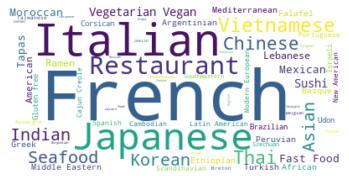

<Figure size 2160x3240 with 0 Axes>

In [44]:
# display the word cloud
plt.imshow(Paris_cuisine, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

The three most existed and preferred food in Paris are:

1. French
2. Italian
3. Japanese

### WORD CLOUD For each borough

Arrondissement1


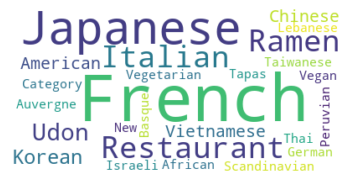

<Figure size 2160x3240 with 0 Axes>

Arrondissement2


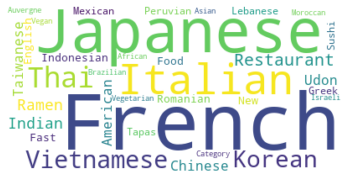

<Figure size 2160x3240 with 0 Axes>

Arrondissement3


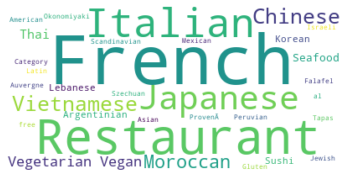

<Figure size 2160x3240 with 0 Axes>

Arrondissement4


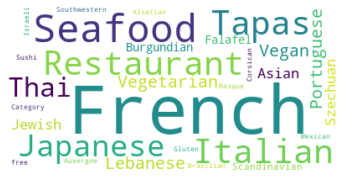

<Figure size 2160x3240 with 0 Axes>

Arrondissement5


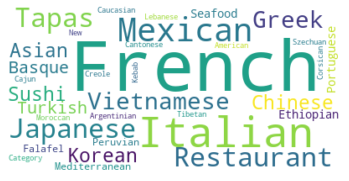

<Figure size 2160x3240 with 0 Axes>

Arrondissement6


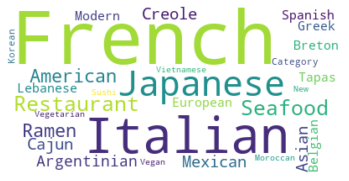

<Figure size 2160x3240 with 0 Axes>

Arrondissement7


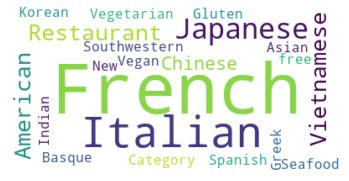

<Figure size 2160x3240 with 0 Axes>

Arrondissement8


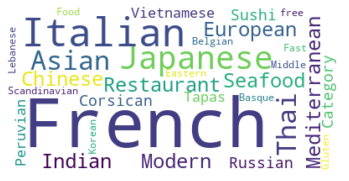

<Figure size 2160x3240 with 0 Axes>

Arrondissement9


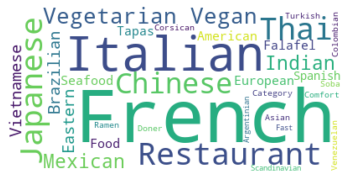

<Figure size 2160x3240 with 0 Axes>

Arrondissement10


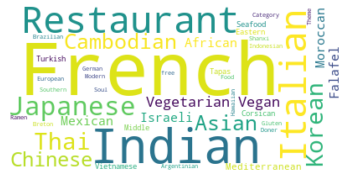

<Figure size 2160x3240 with 0 Axes>

Arrondissement11


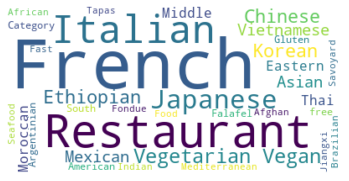

<Figure size 2160x3240 with 0 Axes>

Arrondissement12


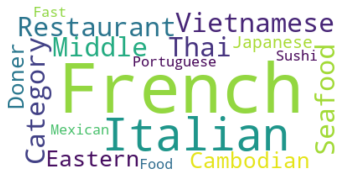

<Figure size 2160x3240 with 0 Axes>

Arrondissement13


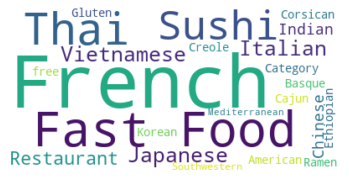

<Figure size 2160x3240 with 0 Axes>

Arrondissement14


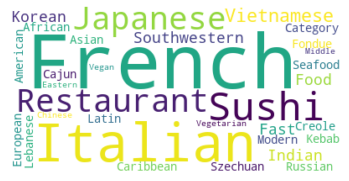

<Figure size 2160x3240 with 0 Axes>

Arrondissement15


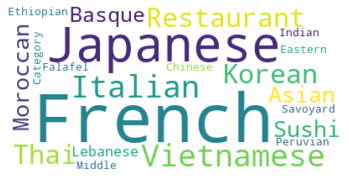

<Figure size 2160x3240 with 0 Axes>

Arrondissement16


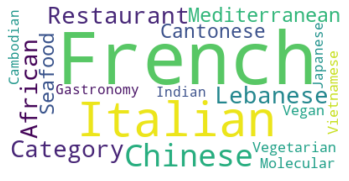

<Figure size 2160x3240 with 0 Axes>

Arrondissement17


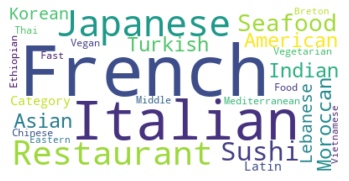

<Figure size 2160x3240 with 0 Axes>

Arrondissement18


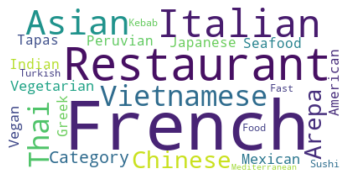

<Figure size 2160x3240 with 0 Axes>

Arrondissement19


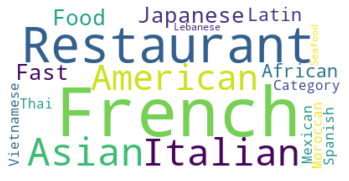

<Figure size 2160x3240 with 0 Axes>

Arrondissement20


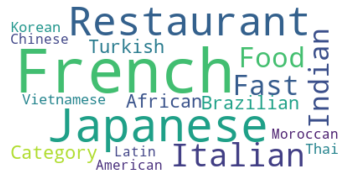

<Figure size 2160x3240 with 0 Axes>

In [45]:
for i in range(1,21):
    data = df_restaurant[df_restaurant['Borough'] == i].reset_index(drop=True)
    data.head()
    data_cuisine = data[['Restaurant Category']]
    
    data_cuisine.to_csv('data_cuisine.txt', sep=',', index=False)
    data_cuisine = open('data_cuisine.txt', 'r').read()
    stopwords = set(STOPWORDS)
    # instantiate a word cloud object
    data_cuisine_WC = WordCloud(
        background_color='white',
        max_words=2000,
        stopwords=stopwords
    )

    # generate the word cloud
    data_cuisine_WC.generate(data_cuisine)
    
    print("Arrondissement"+str(i))
    # display the word cloud
    plt.imshow(data_cuisine_WC, interpolation='bilinear')
    plt.axis('off')

    fig = plt.figure()
    fig.set_figwidth(30)
    fig.set_figheight(45)

    plt.show()
    

We see essentially french and italian cuisine dominates in boroughs in Paris

## 4. Analysing Farmer market in each borough in Paris

To have fresh ingredient for dishes, it is preferable for business of restauration to be close to farmer market. In this section, farmer markets through each borough in Paris will be discovered. We should find here borough that contains higher number of farmer markets to ensure quality and competitivity (Borough where there is a big number of farmer market,it will be more competitive in order of products that are related to restauration business, so cost will be smaller).  

These information are available in Paris Data web site following this link:
https://opendata.paris.fr/explore/dataset/marches-decouverts/table/?disjunctive.produit&disjunctive.ardt&disjunctive.jours_tenue&disjunctive.gestionnaire&basemap=jawg.dark&location=12,48.86175,2.33563

In [46]:
df_market = pd.read_json('https://opendata.paris.fr/explore/dataset/marches-decouverts/download/?format=json&timezone=Europe/Berlin')
df_market.head()

datasetid                                             fields  \
0  marches-decouverts  {'produit': 'Alimentaire', 'secteur': 'C', 'no...   
1  marches-decouverts  {'produit': 'Alimentaire', 'secteur': 'A', 'no...   
2  marches-decouverts  {'mardi': 0, 'lineaire': 259.0, 'nom_long': 'M...   
3  marches-decouverts  {'mardi': 0, 'nom_long': 'MARCHÉ AUX TIMBRES C...   
4  marches-decouverts  {'produit': 'Alimentaire', 'secteur': 'B', 'no...   

                                            geometry  \
0  {'type': 'Point', 'coordinates': [2.3447171000...   
1  {'type': 'Point', 'coordinates': [2.3842380838...   
2  {'type': 'Point', 'coordinates': [2.3170760320...   
3  {'type': 'Point', 'coordinates': [2.3138139325...   
4  {'type': 'Point', 'coordinates': [2.3610764628...   

                record_timestamp                                  recordid  
0  2019-11-20T18:00:32.132+01:00  02ae925e972e160953c2edb8a632c8926e7fe992  
1  2019-11-20T18:00:32.132+01:00  58be2096a7560e5c0ba6e7f2f5c437eaa4f12860  
2  2019-11-20T18:00:32.132+01:00  8397eab699862278a25b97b8c2eaa50a7b7e1773  
3  2019-11-20T18:00:32.132+01:00  347593b36df942f17afe6b66b0c105e6b7bfa628  
4  2019-11-20T18:00:32.132+01:00  6ac17bb1188a6f1d32a2891f6c8d9b1600129022

The dataset below gives information about existed markets in Paris for buying ingredient. Columns consists on:  
* ardt: Borough
* dimanche: if market opens Sunday (1) if not (0)
* geo_point_2d: Localisation of market
* gestionnaire: name of company that manage the market
* Information about opening time and closing time
* id_marche: Identification of market
* localisation: Adress of market
* jours_tenue: Days of opening of markets
* produit: product that are bought in the market

In [47]:
df_market_r = pd.DataFrame()
for m in df_market.fields:
    dict_new = m
    df_market_r = df_market_r.append(dict_new, ignore_index=True)

df_market = df_market_r[df_market_r.produit == 'Alimentaire']
df_market.head()

ardt  dimanche                    geo_point_2d  \
0   9.0       0.0    [48.88198463, 2.34471710004]   
1  11.0       0.0  [48.8656853802, 2.38423808387]   
2  14.0       1.0  [48.8312961895, 2.31707603203]   
4  13.0       0.0  [48.8392951387, 2.36107646283]   
6  15.0       1.0  [48.8499668915, 2.29506130014]   

                                           geo_shape       gestionnaire  \
0  {'type': 'Polygon', 'coordinates': [[[2.344507...             Dadoun   
1  {'type': 'Polygon', 'coordinates': [[[2.384842...  Cordonnier Frères   
2  {'type': 'Polygon', 'coordinates': [[[2.316187...          Bensidoun   
4  {'type': 'Polygon', 'coordinates': [[[2.360919...          Bensidoun   
6  {'type': 'MultiPolygon', 'coordinates': [[[[2....             Dadoun   

  h_deb_sem_1 h_fin_sem_1  id_marche  jeudi         jours_tenue  lineaire  \
0       15:00       20:30       12.0    0.0        vendredi apm     176.0   
1       07:00       14:30       17.0    0.0    mardi,  vendredi     293.0   
2       07:00       14:30       39.0    0.0  mercredi, dimanche     259.0   
4       07:00       14:30       31.0    0.0     mardi, vendredi      60.0   
6       07:00       14:30       42.0    0.0  mercredi, dimanche     843.0   

                                        localisation  lundi  mardi  mercredi  \
0  place d'Anvers le long du square d'Anvers en v...    0.0    0.0       0.0   
1  terre-plein boulevard de Ménilmontant, entre l...    0.0    1.0       0.0   
2  avenue Villemain sur le terre-plein, entre cet...    0.0    0.0       1.0   
4  boulevard de l'Hôpital, le long du square Mari...    0.0    1.0       0.0   
6  terre-plein du boulevard de Grenelle, entre la...    0.0    0.0       1.0   

       nom_court              nom_long      produit  samedi secteur  vendredi  \
0         ANVERS         MARCHÉ ANVERS  Alimentaire     0.0       C       1.0   
1  PERE LACHAISE  MARCHÉ PERE LACHAISE  Alimentaire     0.0       A       1.0   
2      VILLEMAIN      MARCHÉ VILLEMAIN  Alimentaire     0.0       B       0.0   
4    SALPETRIERE    MARCHÉ SALPETRIERE  Alimentaire     0.0       B       1.0   
6       GRENELLE       MARCHÉ GRENELLE  Alimentaire     0.0       C       0.0   

  h_deb_dim h_fin_dim h_deb_sam h_fin_sam  
0       NaN       NaN       NaN       NaN  
1       NaN       NaN       NaN       NaN  
2     07:00     15:00       NaN       NaN  
4       NaN       NaN       NaN       NaN  
6     07:00     15:00       NaN       NaN

In [48]:
df_market = df_market.rename(columns = {"ardt":"Borough"})

convert_dict = {'Borough': int}

df_market = df_market.astype(convert_dict)

df_market.head()

Borough  dimanche                    geo_point_2d  \
0        9       0.0    [48.88198463, 2.34471710004]   
1       11       0.0  [48.8656853802, 2.38423808387]   
2       14       1.0  [48.8312961895, 2.31707603203]   
4       13       0.0  [48.8392951387, 2.36107646283]   
6       15       1.0  [48.8499668915, 2.29506130014]   

                                           geo_shape       gestionnaire  \
0  {'type': 'Polygon', 'coordinates': [[[2.344507...             Dadoun   
1  {'type': 'Polygon', 'coordinates': [[[2.384842...  Cordonnier Frères   
2  {'type': 'Polygon', 'coordinates': [[[2.316187...          Bensidoun   
4  {'type': 'Polygon', 'coordinates': [[[2.360919...          Bensidoun   
6  {'type': 'MultiPolygon', 'coordinates': [[[[2....             Dadoun   

  h_deb_sem_1 h_fin_sem_1  id_marche  jeudi         jours_tenue  lineaire  \
0       15:00       20:30       12.0    0.0        vendredi apm     176.0   
1       07:00       14:30       17.0    0.0    mardi,  vendredi     293.0   
2       07:00       14:30       39.0    0.0  mercredi, dimanche     259.0   
4       07:00       14:30       31.0    0.0     mardi, vendredi      60.0   
6       07:00       14:30       42.0    0.0  mercredi, dimanche     843.0   

                                        localisation  lundi  mardi  mercredi  \
0  place d'Anvers le long du square d'Anvers en v...    0.0    0.0       0.0   
1  terre-plein boulevard de Ménilmontant, entre l...    0.0    1.0       0.0   
2  avenue Villemain sur le terre-plein, entre cet...    0.0    0.0       1.0   
4  boulevard de l'Hôpital, le long du square Mari...    0.0    1.0       0.0   
6  terre-plein du boulevard de Grenelle, entre la...    0.0    0.0       1.0   

       nom_court              nom_long      produit  samedi secteur  vendredi  \
0         ANVERS         MARCHÉ ANVERS  Alimentaire     0.0       C       1.0   
1  PERE LACHAISE  MARCHÉ PERE LACHAISE  Alimentaire     0.0       A       1.0   
2      VILLEMAIN      MARCHÉ VILLEMAIN  Alimentaire     0.0       B       0.0   
4    SALPETRIERE    MARCHÉ SALPETRIERE  Alimentaire     0.0       B       1.0   
6       GRENELLE       MARCHÉ GRENELLE  Alimentaire     0.0       C       0.0   

  h_deb_dim h_fin_dim h_deb_sam h_fin_sam  
0       NaN       NaN       NaN       NaN  
1       NaN       NaN       NaN       NaN  
2     07:00     15:00       NaN       NaN  
4       NaN       NaN       NaN       NaN  
6     07:00     15:00       NaN       NaN

In [77]:
cnt = df_market['nom_court'].value_counts().sum()
cnt

68

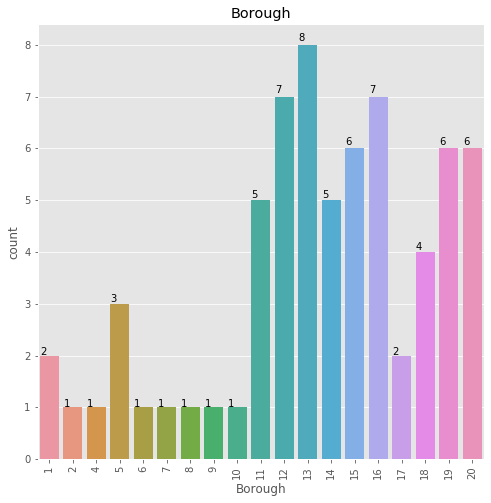

In [78]:
# Plot of number of food markets for each borough
import seaborn as sns

fig,ax = plt.subplots(1, 1, figsize=(8, 8))
sns.countplot(x='Borough',data=df_market)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

We see that boroughs (*arrondissements*) 12, 13 and 16 are the boroughs that have most number of food markets. So for frechness and lower cost of ingeredients, a restaurant can be started in one of these boroughs.

**Use geopy library to get the latitude and longitude values of Paris.**

In [51]:
address = 'Paris, PAR'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8418339, 2.3497835.


Create a map of Paris with name of market and Borough superimposed on top.

In [79]:
# create map of Paris using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for [lat, lng], FacilityName, borough in zip(df_market['geo_point_2d'], df_market['nom_long'], df_market['Borough']):
            label = '{}, Arrondissement {}'.format(FacilityName, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets)  

map_markets

## 5. Segmenting and clustering Neighborhoods in Paris

### Introduction

In this section of the project, we will use the Foursquare API to explore neighborhoods in each borough (or *arrondissement* in french). We will use the explore function to get the most common venue categories in each neighborhood, and then use this feature to group the neighborhoods into clusters. We will use the k-means clustering algorithm to complete this task. Finally, we will use the Folium library to visualize the neighborhoods in each one of 20 boroughis in paris and their emerging clusters.

***Download are libraries that will be needed***

In [53]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Data of venues in Paris is already explored using Foursquare API. It is containing in *paris_venues* dataframe.

In [54]:
paris_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Bonne-Nouvelle               48.86715                 2.35008   
1  Bonne-Nouvelle               48.86715                 2.35008   
2  Bonne-Nouvelle               48.86715                 2.35008   
3  Bonne-Nouvelle               48.86715                 2.35008   
4  Bonne-Nouvelle               48.86715                 2.35008   

                        Venue  Venue Latitude  Venue Longitude  \
0                Hoppy Corner       48.867726         2.347375   
1              Ma Cave Fleury       48.865505         2.350544   
2        Les Amis des Messina       48.867166         2.348420   
3  Experimental Cocktail Club       48.866151         2.348370   
4                        Klay       48.866039         2.349656   

         Venue Category  
0              Beer Bar  
1              Wine Bar  
2    Italian Restaurant  
3          Cocktail Bar  
4  Gym / Fitness Center

In [55]:
paris_venues.shape

(5510, 7)

In [56]:
paris_venues.groupby('Venue Category')['Venue'].count().sort_values(ascending=False)

Venue Category
French Restaurant                  707
Hotel                              439
Italian Restaurant                 194
Bar                                184
Café                               167
Bakery                             156
Bistro                             143
Japanese Restaurant                136
Coffee Shop                        125
Plaza                              110
Wine Bar                            94
Cocktail Bar                        91
Restaurant                          90
Pizza Place                         88
Sandwich Place                      69
Clothing Store                      61
Burger Joint                        58
Pastry Shop                         51
Theater                             50
Ice Cream Shop                      50
Vietnamese Restaurant               50
Supermarket                         49
Park                                47
Thai Restaurant                     47
Garden                              44
Boutique  

Check how many venues are returned by each neighborhood

In [57]:
paris_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Amérique                                      15                      15   
Archives                                     100                     100   
Arsenal                                       75                      75   
Arts-et-Métiers                              100                     100   
Auteuil                                       15                      15   
Batignolles                                   99                      99   
Bel-Air                                        6                       6   
Belleville                                    42                      42   
Bercy                                         62                      62   
Bonne-Nouvelle                               100                     100   
Chaillot                                     100                     100   
Champs-Elysées                               100                     100   
Charonne                                      38                      38   
Chaussée-d'Antin                             100                     100   
Clignancourt                                  65                      65   
Combat                                        27                      27   
Croulebarbe                                   49                      49   
Ecole-Militaire                               19                      19   
Enfants-Rouges                               100                     100   
Epinettes                                     25                      25   
Europe                                        66                      66   
Faubourg-Montmartre                          100                     100   
Faubourg-du-Roule                            100                     100   
Folie-Méricourt                              100                     100   
Gaillon                                      100                     100   
Gare                                          48                      48   
Goutte-d'Or                                   32                      32   
Grandes-Carrières                             55                      55   
Grenelle                                      48                      48   
Gros-Caillou                                 100                     100   
Halles                                       100                     100   
Hôpital-Saint-Louis                           94                      94   
Invalides                                     59                      59   
Jardin-des-Plantes                            71                      71   
Javel                                         32                      32   
La Chapelle                                   15                      15   
Madeleine                                    100                     100   
Mail                                         100                     100   
Maison-Blanche                                37                      37   
Monnaie                                      100                     100   
Montparnasse                                  88                      88   
Muette                                         7                       7   
Necker                                        45                      45   
Notre-Dame                                   100                     100   
Notre-Dame-des-Champs                        100                     100   
Odéon                                         90                      90   
Palais-Royal                                 100                     100   
Parc-de-Montsouris                            17                      17   
Petit-Montrouge                               69                      69   
Picpus                                         3                       3   
Place-Vendôme                                100                     100   

Find out how many unique categories can be curated from all the returned venues.

In [58]:
print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 301 uniques categories.


### Analyze each neighborhood

In [59]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

#column lists before adding neighborhood
column_names = ['Neighborhood'] + list(paris_onehot.columns)

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['Neighborhood'] 

# move neighborhood column to the first column
paris_onehot = paris_onehot[column_names]

paris_onehot.head()

Neighborhood  Accessories Store  Afghan Restaurant  African Restaurant  \
0  Bonne-Nouvelle                  0                  0                   0   
1  Bonne-Nouvelle                  0                  0                   0   
2  Bonne-Nouvelle                  0                  0                   0   
3  Bonne-Nouvelle                  0                  0                   0   
4  Bonne-Nouvelle                  0                  0                   0   

   Alsatian Restaurant  American Restaurant  Antique Shop  Arcade  \
0                    0                    0             0       0   
1                    0                    0             0       0   
2                    0                    0             0       0   
3                    0                    0             0       0   
4                    0                    0             0       0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auditorium  Auvergne Restaurant  BBQ Joint  Baby Store  \
0                   0           0                    0          0           0   
1                   0           0                    0          0           0   
2                   0           0                    0          0           0   
3                   0           0                    0          0           0   
4                   0           0                    0          0           0   

   Bagel Shop  Bakery  Bar  Basketball Court  Basque Restaurant  \
0           0       0    0                 0                  0   
1           0       0    0                 0                  0   
2           0       0    0                 0                  0   
3           0       0    0                 0                  0   
4           0       0    0                 0                  0   

   Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  Belgian Restaurant  \
0                0         1            0           0                   0   
1                0         0            0           0                   0   
2                0         0            0           0                   0   
3                0         0            0           0                   0   
4                0         0            0           0                   0   

   Big Box Store  Bike Rental / Bike Share  Bistro  Boarding House  \
0              0                         0       0               0   
1              0                         0       0               0   
2              0                         0       0               0   
3              0                         0       0               0   
4              0                         0       0               0   

   Boat or Ferry  Bookstore  Botanical Garden  Boutique  Boxing Gym  \
0              0          0                 0         0           0   
1              0          0                 0         0           0   
2              0          0                 0         0           0   
3              0          0                 0         0           0   
4              0          0                 0         0           0   

   Brasserie  Brazilian Restaurant  Breakfast Spot  Breton Restaurant  \
0          

Let's filter only restaurant data

In [60]:
restaurant_List = []
search = 'Restaurant'
for i in paris_onehot.columns :
    if search in i:
        restaurant_List.append(i)

In [61]:
restaurant_List

['Afghan Restaurant',
 'African Restaurant',
 'Alsatian Restaurant',
 'American Restaurant',
 'Arepa Restaurant',
 'Argentinian Restaurant',
 'Asian Restaurant',
 'Auvergne Restaurant',
 'Basque Restaurant',
 'Belgian Restaurant',
 'Brazilian Restaurant',
 'Breton Restaurant',
 'Burgundian Restaurant',
 'Cajun / Creole Restaurant',
 'Cambodian Restaurant',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Caucasian Restaurant',
 'Chinese Restaurant',
 'Colombian Restaurant',
 'Comfort Food Restaurant',
 'Corsican Restaurant',
 'Doner Restaurant',
 'Eastern European Restaurant',
 'English Restaurant',
 'Ethiopian Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Fondue Restaurant',
 'French Restaurant',
 'German Restaurant',
 'Gluten-free Restaurant',
 'Greek Restaurant',
 'Hawaiian Restaurant',
 'Indian Restaurant',
 'Indonesian Restaurant',
 'Israeli Restaurant',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Jewish Restaurant',
 'Jiangxi Restaurant',
 'Kebab Restaura

In [62]:
col_name = []
col_name = ['Neighborhood'] + restaurant_List
paris_restaurant = paris_onehot[col_name]

In [63]:
paris_restaurant_grouped = paris_restaurant.groupby('Neighborhood').sum().reset_index()

In [64]:
paris_restaurant_grouped['Total'] = paris_restaurant_grouped.sum(axis=1)

paris_restaurant_grouped.head()

Neighborhood  Afghan Restaurant  African Restaurant  \
0         Amérique                  0                   0   
1         Archives                  0                   0   
2          Arsenal                  0                   0   
3  Arts-et-Métiers                  0                   0   
4          Auteuil                  0                   0   

   Alsatian Restaurant  American Restaurant  Arepa Restaurant  \
0                    0                    0                 0   
1                    0                    0                 0   
2                    0                    0                 0   
3                    0                    0                 0   
4                    0                    0                 0   

   Argentinian Restaurant  Asian Restaurant  Auvergne Restaurant  \
0                       0                 0                    0   
1                       0                 0                    0   
2                       0                 1                    0   
3                       1                 0                    1   
4                       0                 0                    0   

   Basque Restaurant  Belgian Restaurant  Brazilian Restaurant  \
0                  0                   0                     0   
1                  0                   0                     0   
2                  0                   0                     1   
3                  0                   0                     0   
4                  0                   0                     0   

   Breton Restaurant  Burgundian Restaurant  Cajun / Creole Restaurant  \
0                  0                      0                          0   
1                  0                      0                          0   
2                  0                      0                          0   
3                  0                      0                          0   
4                  0                      0                          0   

   Cambodian Restaurant  Cantonese Restaurant  Caribbean Restaurant  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Caucasian Restaurant  Chinese Restaurant  Colombian Restaurant  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   4                     0   
4                     0                   0                     0   

   Comfort Food Restaurant  Corsican Restaurant  Doner Restaurant  \
0                        0                    0                 0   
1                        0                    0                 0   
2                        0                    0                 0   
3                        0                    0                 0   
4                        0                    0                 0   

   Eastern European Restaurant  English Restaurant  Ethiopian Restaurant  \
0                            0                   0                     0   
1                            0                   0                     0   
2                            0                   0                     0   
3                            0                   0                     0   
4                            0                   0                     0   

   Falafel Restaurant  Fast Food Restaurant  Fondue Restaurant  \
0                   0                     0                  0   
1                   1                     0                  0   
2                   0                     0                  0   
3                  

### Cluster Neighborhoods and Exmine clusters

**First, let's determine the optimal value of K for our dataset using the Silhouette Coefficient Method.**

A higher ***Silhouette Coefficient*** score relates to a model with better-defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores: `

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient is for a single sample is then given as:

s=b-a/max(a,b)

Now, to find the optimal value of k for KMeans, loop through 1..n for n_clusters in KMeans and calculate Silhouette Coefficient for each sample.

A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

Silhouette-coefficient is part of sikitlearn library and its documentation is in this link: https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [65]:
paris_grouped_clustering = paris_restaurant_grouped.drop('Neighborhood', 1)

for n_cluster in range(2, 20):
    kmeans = KMeans(n_clusters=n_cluster).fit(paris_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(paris_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))


For n_clusters=2, The Silhouette Coefficient is 0.4686822141989957
For n_clusters=3, The Silhouette Coefficient is 0.3771481015862769
For n_clusters=4, The Silhouette Coefficient is 0.3526934827842539
For n_clusters=5, The Silhouette Coefficient is 0.30848994006405595
For n_clusters=6, The Silhouette Coefficient is 0.28888522262768646
For n_clusters=7, The Silhouette Coefficient is 0.2959770113764255
For n_clusters=8, The Silhouette Coefficient is 0.2959592252161669
For n_clusters=9, The Silhouette Coefficient is 0.27205682369987005
For n_clusters=10, The Silhouette Coefficient is 0.2874344218487823
For n_clusters=11, The Silhouette Coefficient is 0.25705115167833353
For n_clusters=12, The Silhouette Coefficient is 0.25750896166877546
For n_clusters=13, The Silhouette Coefficient is 0.21763884489726756
For n_clusters=14, The Silhouette Coefficient is 0.2519415194084128
For n_clusters=15, The Silhouette Coefficient is 0.23828555579295402
For n_clusters=16, The Silhouette Coefficient is 

As we can see, n_clusters=2 has highest Silhouette Coefficient. This means that 2 should be the optimal number of clusters.
For n_clusters=2, The Silhouette Coefficient is 0.4683044246374258.

Run k-means to cluster the neighborhood into 2 clusters.

In [66]:
# set number of clusters
kclusters = 2

paris_grouped_clustering = paris_restaurant_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [67]:
paris_results = pd.DataFrame(kmeans.cluster_centers_)
paris_results.columns = paris_grouped_clustering.columns
paris_results.index = ['cluster0','cluster1']
paris_results['Total Sum'] = paris_results.sum(axis = 1)
paris_results

Afghan Restaurant  African Restaurant  Alsatian Restaurant  \
cluster0      -5.204170e-18            0.162162         2.702703e-02   
cluster1       2.325581e-02            0.116279        -1.734723e-18   

          American Restaurant  Arepa Restaurant  Argentinian Restaurant  \
cluster0             0.054054          0.027027                0.054054   
cluster1             0.302326          0.023256                0.162791   

          Asian Restaurant  Auvergne Restaurant  Basque Restaurant  \
cluster0          0.405405        -2.081668e-17           0.027027   
cluster1          0.488372         9.302326e-02           0.186047   

          Belgian Restaurant  Brazilian Restaurant  Breton Restaurant  \
cluster0       -2.081668e-17              0.027027           0.027027   
cluster1        6.976744e-02              0.139535           0.069767   

          Burgundian Restaurant  Cajun / Creole Restaurant  \
cluster0          -1.040834e-17                   0.027027   
cluster1           4.651163e-02                   0.116279   

          Cambodian Restaurant  Cantonese Restaurant  Caribbean Restaurant  \
cluster0              0.027027         -1.040834e-17         -5.204170e-18   
cluster1              0.116279          4.651163e-02          2.325581e-02   

          Caucasian Restaurant  Chinese Restaurant  Colombian Restaurant  \
cluster0         -5.204170e-18            0.270270         -5.204170e-18   
cluster1          2.325581e-02            0.744186          2.325581e-02   

          Comfort Food Restaurant  Corsican Restaurant  Doner Restaurant  \
cluster0            -5.204170e-18             0.054054          0.027027   
cluster1             2.325581e-02             0.116279          0.046512   

          Eastern European Restaurant  English Restaurant  \
cluster0                -1.040834e-17       -1.040834e-17   
cluster1                 4.651163e-02        4.651163e-02   

          Ethiopian Restaurant  Falafel Restaurant  Fast Food Restaurant  \
cluster0              0.081081            0.027027              0.378378   
cluster1              0.139535            0.255814              0.186047   

          Fondue Restaurant  French Restaurant  German Restaurant  \
cluster0      -1.040834e-17           4.378378      -1.040834e-17   
cluster1       4.651163e-02          12.674419       4.651163e-02   

          Gluten-free Restaurant  Greek Restaurant  Hawaiian Restaurant  \
cluster0                0.054054          0.054054        -5.204170e-18   
cluster1                0.116279          0.162791         2.325581e-02   

          Indian Restaurant  Indonesian Restaurant  Israeli Restaurant  \
cluster0           0.405405          -2.081668e-17            0.054054   
cluster1           0.488372           6.976744e-02            0.116279   

          Italian Restaurant  Japanese Restaurant  Jewish Restaurant  \
cluster0            1.108108             1.027027           0.027027   
cluster1            3.558140             2.279070           0.046512   

          Jiangxi Restaurant  Kebab Restaurant  Korean Restaurant  \
cluster0        2.702703e-02          0.027027           0.243243   
cluster1       -1.734723e-18          0.046512           0.581395   

          Latin American Restaurant  Lebanese Restaurant  \
cluster0                   0.081081             0.108108   
cluster1                   0.069767             0.348837   

          Mediterranean Restaurant  Mexican Restaurant  \
cluster0                  0.081081            0.081081   
cluster1                  0.209302            0.488372   

          Middle Eastern Restaurant  Modern European Restaurant  \
cluster0                   0.027027                    0.027027   
cluster1                   0.186047                    0.116279   

          Molecular Gastronomy Restaurant  Moroccan Restaurant  \
cluster0                    -5.204170e-18             0.162162   
cluster1                     2.325581e-02             0.348837   

    

Cluster 0 has the smallest velue for total and total sum of mean of clusters

**Dataframe with Neighborhood,Cluster No and Total Sum**

In [68]:
paris_results_merged = pd.DataFrame(paris_restaurant_grouped['Neighborhood'])

paris_results_merged['Total'] = paris_restaurant_grouped['Total']
paris_results_merged = paris_results_merged.assign(Cluster_Labels = kmeans.labels_)

In [69]:
print(paris_results_merged.shape)
paris_results_merged

(80, 3)


Neighborhood  Total  Cluster_Labels
0                    Amérique      2               0
1                    Archives     21               0
2                     Arsenal     30               1
3             Arts-et-Métiers     39               1
4                     Auteuil      1               0
5                 Batignolles     48               1
6                     Bel-Air      1               0
7                  Belleville     17               0
8                       Bercy     12               0
9              Bonne-Nouvelle     26               1
10                   Chaillot     40               1
11             Champs-Elysées     29               1
12                   Charonne      7               0
13           Chaussée-d'Antin     22               0
14               Clignancourt     21               0
15                     Combat     11               0
16                Croulebarbe     25               1
17            Ecole-Militaire      4               0
18             Enfants-Rouges     25               1
19                  Epinettes     10               0
20                     Europe     28               1
21        Faubourg-Montmartre     42               1
22          Faubourg-du-Roule     25               1
23            Folie-Méricourt     34               1
24                    Gaillon     34               1
25                       Gare     16               0
26                Goutte-d'Or      9               0
27          Grandes-Carrières     23               1
28                   Grenelle     13               0
29               Gros-Caillou     48               1
30                     Halles     33               1
31        Hôpital-Saint-Louis     37               1
32                  Invalides     23               1
33         Jardin-des-Plantes     25               1
34                      Javel     16               0
35                La Chapelle      7               0
36                  Madeleine     20               0
37                       Mail     32               1
38             Maison-Blanche      9               0
39                    Monnaie     37               1
40               Montparnasse     30               1
41                     Muette      2               0
42                     Necker     15               0
43                 Notre-Dame     39               1
44      Notre-Dame-des-Champs     30               1
45                      Odéon     16               0
46               Palais-Royal     37               1
47         Parc-de-Montsouris     10               0
48            Petit-Montrouge     21               0
49                     Picpus      0               0
50              Place-Vendôme     26               1
51         Plaine de Monceaux     29               1
52                  Plaisance     13               0
53            Pont-de-Flandre     18               0
54             Porte-Dauphine      0               0
55          Porte-Saint-Denis     47               1
56         Porte-Saint-Martin     36               1
57              Père-Lachaise     11               0
58              Quinze-Vingts     23               1
59               Rochechouart     31               1
60                   Roquette     33               1
61             Saint-Ambroise     31               1
62              Saint-Fargeau      2               0
63              Saint-Georges     35               1
64     Saint-Germain-des-Prés     39               1
65  Saint-Germain-l'Auxerrois     20               0
66              Saint-Gervais     30               1
67              Saint-Lambert     25               1
68                Saint-Merri     19               0
69       Saint-Thomas-d'Aquin     31               1
70               Saint-Victor     40               1
71      Saint-Vincent-de-Paul     21               0
72               Sainte-Avoie     35               1
73          Sainte-Marguerite     21               0
74                Salpêtrière     10      

Merge paris_results_merged with df_quartier.

In [70]:
df3 = df1

# .groupby("Neighborhood",sort = False).agg(lambda x:','.join(set(x))).reset_index()

df3['Latitude&Longitude'] = df_quartier[['geom_x_y']]

df3.sort_values(by = 'Borough',axis = 0, ascending = True, inplace = True)

paris_merged = df3

paris_merged = paris_merged.join(paris_results_merged.set_index('Neighborhood'), on='Neighborhood').reset_index(drop = True)

print(paris_merged.shape)
paris_merged.head(10) # check the last columns!

(80, 5)


Borough               Neighborhood                   Latitude&Longitude  \
0        1  Saint-Germain-l'Auxerrois       [48.8606501352, 2.33491032928]   
1        1              Place-Vendôme  [48.8670185906, 2.3285816649299997]   
2        1                     Halles       [48.8622891081, 2.34489885831]   
3        1               Palais-Royal       [48.8646599781, 2.33630891897]   
4        2                       Mail       [48.8680083374, 2.34469912743]   
5        2                    Gaillon       [48.8693066381, 2.33343180766]   
6        2                   Vivienne       [48.8691001998, 2.33946074375]   
7        2             Bonne-Nouvelle       [48.8671501183, 2.35008019041]   
8        3               Sainte-Avoie        [48.862557245, 2.35485151825]   
9        3            Arts-et-Métiers       [48.8664702895, 2.35708313106]   

   Total  Cluster_Labels  
0     20               0  
1     26               1  
2     33               1  
3     37               1  
4     32               1  
5     34               1  
6     48               1  
7     26               1  
8     35               1  
9     39               1

Finally, let's visualize the resulting clusters

In [71]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for [lat, lon], poi, cluster in zip(paris_merged['Latitude&Longitude'], paris_merged['Neighborhood'], paris_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 6. Listing Neighborhoods of interests in Paris

### Cluster 1: Saturated Markets

In [72]:
paris_merged[paris_merged['Cluster_Labels'] == 1].reset_index(drop=True)

Borough            Neighborhood                   Latitude&Longitude  \
0         1           Place-Vendôme  [48.8670185906, 2.3285816649299997]   
1         1                  Halles       [48.8622891081, 2.34489885831]   
2         1            Palais-Royal       [48.8646599781, 2.33630891897]   
3         2                    Mail       [48.8680083374, 2.34469912743]   
4         2                 Gaillon       [48.8693066381, 2.33343180766]   
5         2                Vivienne       [48.8691001998, 2.33946074375]   
6         2          Bonne-Nouvelle       [48.8671501183, 2.35008019041]   
7         3            Sainte-Avoie        [48.862557245, 2.35485151825]   
8         3         Arts-et-Métiers       [48.8664702895, 2.35708313106]   
9         3          Enfants-Rouges        [48.863887392, 2.36312330099]   
10        4              Notre-Dame       [48.8528955862, 2.35277501212]   
11        4                 Arsenal        [48.851585175, 2.36476795387]   
12        4           Saint-Gervais       [48.8557186509, 2.35816233385]   
13        5      Jardin-des-Plantes       [48.8419401934, 2.35689388962]   
14        5                Sorbonne       [48.8490447659, 2.34574660019]   
15        5            Saint-Victor       [48.8476636355, 2.35409315338]   
16        6  Saint-Germain-des-Prés         [48.85528872, 2.33365686809]   
17        6   Notre-Dame-des-Champs        [48.846427594, 2.32735687823]   
18        6                 Monnaie       [48.8543844036, 2.34003537113]   
19        7               Invalides       [48.8585149661, 2.31644474034]   
20        7    Saint-Thomas-d'Aquin       [48.8552632694, 2.32558765258]   
21        7            Gros-Caillou       [48.8582999039, 2.30154155569]   
22        8       Faubourg-du-Roule       [48.8741355756, 2.30411880972]   
23        8          Champs-Elysées       [48.8670744922, 2.30865168468]   
24        8                  Europe        [48.8781476759, 2.3171746113]   
25        9            Rochechouart         [48.8798119198, 2.344861291]   
26        9     Faubourg-Montmartre       [48.8739346918, 2.34325257947]   
27        9           Saint-Georges       [48.8799343388, 2.33285019656]   
28       10     Hôpital-Saint-Louis         [48.87600829, 2.36812301789]   
29       10       Porte-Saint-Denis        [48.873617661, 2.35228289495]   
30       10      Porte-Saint-Martin       [48.8712446509, 2.36150364735]   
31       11          Saint-Ambroise       [48.8623450235, 2.37611805592]   
32       11                Roquette       [48.8570640408, 2.38036406173]   
33       11         Folie-Méricourt       [48.8674031901, 2.37296482493]   
34       12           Quinze-Vingts       [48.8469159441, 2.37440162648]   
35       13             Croulebarbe       [48.8337336761, 2.34767304607]   
36       14            Montparnasse        [48.837623096, 2.33178382289]   
37       15           Saint-Lambert  [48.8342936284, 2.2969199744499997]   
38       16                Chaillot  [48.8684336145, 2.2916790427400002]   
39       17                  Ternes       [48.8811775503, 2.28996373812]   
40       17             Batignolles       [48.8884815139, 2.31385616901]   
41       17      Plaine de Monceaux       [48.8850436914, 2.30290982465]   
42       18       Grandes-Carrières       [48.8925777711, 2.33436308991]   

    Total  Cluster_Labels  
0      26               1  
1      33               1  
2      37               1  
3      32               1  
4      34               1  
5      48               1  
6      26               1  
7      35               1  
8      39               1  
9      25               1  
10     39               1  
11     30               1  
12     30               1  
13     25               1  
14     27               1  
15     40               1  
16     39               1  
17     30               1  
18     37               1  
19     23               1  
20     31               1  
21     48               1  
22     25      

### Cluster 0: Untapped Markets

In [73]:
paris_merged[paris_merged['Cluster_Labels'] == 0].reset_index(drop=True)

Borough               Neighborhood                   Latitude&Longitude  \
0         1  Saint-Germain-l'Auxerrois       [48.8606501352, 2.33491032928]   
1         3                   Archives       [48.8591924127, 2.36320505733]   
2         4                Saint-Merri       [48.8585213723, 2.35166696714]   
3         5               Val-de-Grâce        [48.841684288, 2.34386092632]   
4         6                      Odéon  [48.847800629299996, 2.33633882759]   
5         7            Ecole-Militaire       [48.8503592615, 2.31103093627]   
6         8                  Madeleine        [48.871265493, 2.32005302865]   
7         9           Chaussée-d'Antin       [48.8735473802, 2.33226886887]   
8        10      Saint-Vincent-de-Paul  [48.8807352373, 2.3574708104499997]   
9        11          Sainte-Marguerite         [48.852096507, 2.3887648336]   
10       12                      Bercy       [48.8352090499, 2.38621008421]   
11       12                     Picpus       [48.8303592424, 2.42882681508]   
12       12                    Bel-Air       [48.8379956461, 2.43317844196]   
13       13                       Gare       [48.8275274578, 2.37239773692]   
14       13                Salpêtrière  [48.8374058852, 2.3633186351499997]   
15       13             Maison-Blanche       [48.8231278057, 2.35243314954]   
16       14         Parc-de-Montsouris       [48.8234527716, 2.33707017986]   
17       14            Petit-Montrouge       [48.8266526255, 2.32643699922]   
18       14                  Plaisance       [48.8303170426, 2.31530493157]   
19       15                   Grenelle        [48.8501716555, 2.2918526427]   
20       15                      Javel       [48.8390604011, 2.27807634692]   
21       15                     Necker       [48.8427112503, 2.31077745364]   
22       16             Porte-Dauphine       [48.8717656343, 2.27191774047]   
23       16                     Muette        [48.8632745438, 2.2599358317]   
24       16                    Auteuil  [48.8506223427, 2.2522769075399998]   
25       17                  Epinettes       [48.8949426538, 2.32111874371]   
26       18                La Chapelle       [48.8940121696, 2.36438677903]   
27       18               Clignancourt       [48.8916675911, 2.34597875459]   
28       18                Goutte-d'Or        [48.8921381876, 2.3555361633]   
29       19                   Amérique       [48.8816381673, 2.39544016662]   
30       19                   Villette       [48.8876610888, 2.37446821213]   
31       19            Pont-de-Flandre       [48.8955557746, 2.38477722927]   
32       19                     Combat       [48.8786390757, 2.38012728183]   
33       20                 Belleville       [48.8715312006, 2.38754923985]   
34       20                   Charonne        [48.854760283, 2.40743032824]   
35       20              Saint-Fargeau       [48.8710347391, 2.40617153015]   
36       20              Père-Lachaise        [48.863719484, 2.39527282076]   

    Total  Cluster_Labels  
0      20               0  
1      21               0  
2      19               0  
3      17               0  
4      16               0  
5       4               0  
6      20               0  
7      22               0  
8      21               0  
9      21               0  
10     12               0  
11      0               0  
12      1               0  
13     16               0  
14     10               0  
15      9               0  
16     10               0  
17     21               0  
18     13               0  
19     13               0  
20     16               0  
21     15               0  
22      0               0  
23      2               0  
24      1               0  
25     10               0  
26      7               0  
27     21               0  
28      9               0  
29      2               0  
30     11               0  
31     18               0  
32     11               0  
33     17               0  
34      7            

In [82]:
print(paris_merged[paris_merged['Cluster_Labels'] == 1].reset_index(drop=True)['Neighborhood'].value_counts().sum())

43


In [84]:
print(paris_merged[paris_merged['Cluster_Labels'] == 0].reset_index(drop=True)['Neighborhood'].value_counts().sum())

37
